In [1]:
import seaborn as sns

In [2]:
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
df = data.loc[:,['bill_depth_mm', 'bill_length_mm']]
df.head()

,bill_depth_mm,bill_length_mm
0,18.7,39.1
1,17.4,39.5
2,18.0,40.3
3,NaN,NaN
4,19.3,36.7


In [6]:
df.isna().sum()

bill_depth_mm     2
bill_length_mm    2
dtype: int64

In [7]:
df.dropna(inplace=True)

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

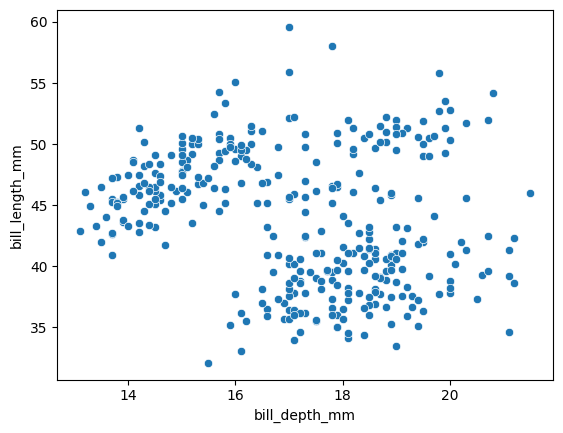

In [8]:
sns.scatterplot(x ='bill_depth_mm', y = 'bill_length_mm', data=df)

In [10]:
cluster_range = range(1, 10)

In [20]:
from sklearn.cluster import KMeans
import numpy as np
ssd = []
for k in cluster_range:
  model = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df)
  ssd.append(model.inertia_)

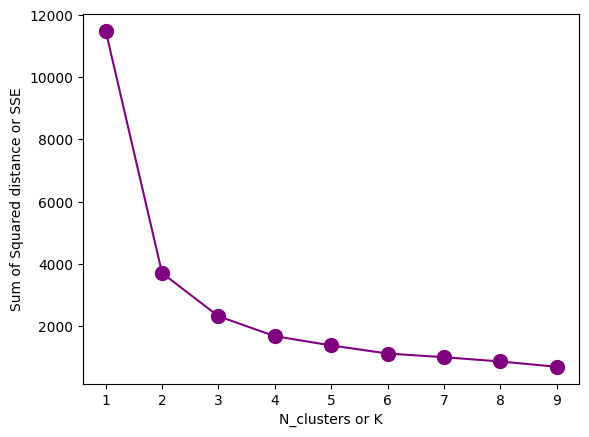

In [21]:
import matplotlib.pyplot as plt
plt.plot(cluster_range, ssd, 'o-', color = 'purple', ms = 10)
plt.xlabel("N_clusters or K")
plt.ylabel("Sum of Squared distance or SSE")
plt.show()

In [22]:
# from elbow method, K = 3

In [34]:
model = KMeans(n_clusters= 3, random_state=0, n_init="auto").fit(df)

In [35]:
clusters = model.predict(df)

In [36]:
model.cluster_centers_

array([[17.33647059, 50.90352941],
       [18.27943262, 38.4035461 ],
       [15.64396552, 45.5137931 ]])

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

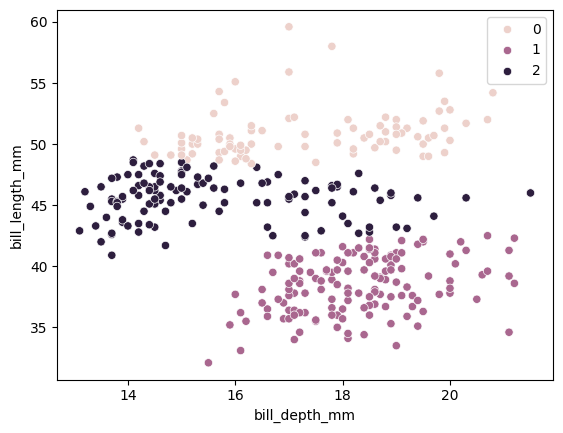

In [37]:
sns.scatterplot(x='bill_depth_mm', y= 'bill_length_mm', hue = clusters, data =  df)